In [28]:
import numpy as np  
import matplotlib.pyplot as plt

def predict(X,Theta):
    # Nhân 2 matrix
    return X@Theta


def computeCost(X,y,Theta):
    predicted = predict(X,Theta)
    # sai số
    sqr_error = (predicted - y) ** 2
    sum_error = np.sum(sqr_error)
    m = np.size(y)
    Jtheta = (1/(2*m)) * sum_error
    return Jtheta


def computeCost_Vec(X,y,Theta):
    error = predict(X,Theta) - y
    m = np.size(y)
    Jtheta = (1/(2*m))*np.transpose(error)@error
    return Jtheta

# Gradient Descent --- Jtheta min

Reach optima at I = 4068 ; J = 4.476971


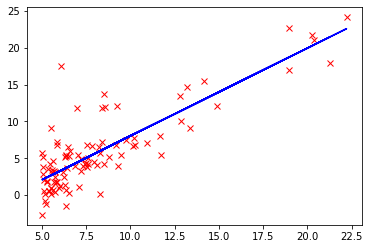

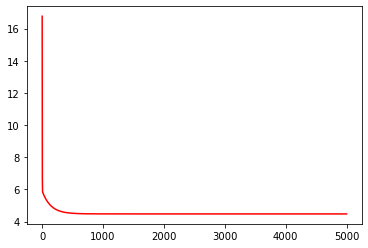

In [29]:


def GradientDescent(X,y,alpha=0.02,iter=5000): #giá trị mặc định của alpha là 0.02, iter (số vòng lặp tối đa) là 5000
    #Giá trị ban đầu của theta = 0
    theta = np.zeros(np.size(X,1)) #số lượng theta bằng số cột của X
    #array lưu lại các giá trị J trong quá trình lặp
    J_hist = np.zeros((iter,2)) # kích thước là iter*2, cột đầu chỉ là các số từ 1 đến iter để tiện cho việc plot. Kích thước được truyền vào qua một tupple
    #kích thước của training set
    m = np.size(y)
    #ma trận ngược (đảo hàng và cột) của X
    X_T = np.transpose(X)
    #biến tạm để kiểm tra tiến độ Gradient Descent
    pre_cost = computeCost(X,y,theta)
    for i in range(0,iter):
        error = predict(X,theta) - y
        #thực hiện gradient descent để thay đổi theta
        theta = theta - (alpha/m)*(X_T @ error)
        #tính J hiện tại
        cost = computeCost(X,y,theta)
        #so sánh với J của vòng lặp trước, so sánh 15 chữ số thập phân
        if np.round(cost,15) == np.round(pre_cost,15):
            #in ra vòng lặp hiện tại và J để dễ debug
            print('Reach optima at I = %d ; J = %.6f' %(i,cost))
            #thêm tất cả các index còn lại sau khi break
            J_hist[i:,0] = range(i,iter)
            #giá trị J sau khi break sẽ như cũ
            J_hist[i:,1] = cost
            #thoát vòng lặp
            break
        #cập nhật pre_cost
        pre_cost = cost
        #lưu lại index vòng lặp hiện tại
        J_hist[i, 0] = i
        #lưu lại J hiện tại
        J_hist[i, 1] = cost
    yield Theta
    yield J_hist
    
raw = np.loadtxt('univariate.txt', delimiter = ',')
#Tách lấy X
X = np.copy(raw)
X[:,1] = X[:,0]
#thêm bias 1
X[:,0] = 1
#Tách lấy y
y = raw[:,1]
#Train data
X = np.copy(raw)
X[:,1] = X[:,0]
#thêm bias 1
X[:,0] = 1
#Tách lấy y
y = raw[:,1]
#Train data
[Theta, J_hist] = GradientDescent(X,y)#mặc định alpha = 0.02 iter = 5000
Theta = Theta
J_hist = J_hist
#Predict
predict = predict(X,Theta) * 10000#chuyển về đơn vị người
#Plot kết quả
plt.figure(1)
plt.plot(X[:,1],y,'rx')
plt.plot(X[:,1],predict/10000,'-b') #đơn vị gốc: nghìn người
plt.figure(2)
plt.plot(J_hist[:,0],J_hist[:,1],'-r')
plt.show() #chỉ gọi 1 lần trong chương trình để hiển thị các biểu đồ cùng lúc